# Exploratory Data Analysis- Diwali Sales

In [489]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [365]:
df= pd.read_excel("C:/Users/mamta shresth/Documents/sql/projects/EDA/Python_Diwali_Sales_Analysis-main/diwali sales (uncleaned).xlsx")

# Feature Binning

In [375]:
df

,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,28,Married,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,35,Unmarried,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,35,Unmarried,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,16,Married,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,28,Unmarried,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,19,Unmarried,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,33,Married,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,40,Married,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,37,Married,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [371]:
df.Age.min()

12

In [373]:
df.Age.max()

92

In [479]:
labels = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55','55+']
bins =[0,17,25,35,45,50,55,100]

df["Age bins"]= pd.cut(df.Age, bins , labels= labels, include_lowest=True)

In [481]:
df

,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1,Age bins
0,1002903,Sanskriti,P00125942,F,28,Married,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN,26-35
1,1000732,Kartik,P00110942,F,35,Unmarried,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN,26-35
2,1001990,Bindu,P00118542,F,35,Unmarried,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN,26-35
3,1001425,Sudevi,P00237842,M,16,Married,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN,0-17
4,1000588,Joni,P00057942,M,28,Unmarried,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN,26-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,19,Unmarried,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN,18-25
11247,1004089,Reichenbach,P00171342,M,33,Married,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN,26-35
11248,1001209,Oshin,P00201342,F,40,Married,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN,36-45
11249,1004023,Noonan,P00059442,M,37,Married,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN,36-45


In [485]:
# relocating the age bins column

column_to_move= df.pop("Age bins")

df.insert(4, "Age bins", column_to_move)

In [487]:
df

,User_ID,Cust_name,Product_ID,Gender,Age bins,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,Married,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,Unmarried,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,Unmarried,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,Married,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,Unmarried,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,Unmarried,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,Married,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,Married,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,Married,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


# Feature Encoding- Label Encoding

In [492]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age bins', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [494]:
#initiating Label encoding
LE= preprocessing.LabelEncoder()

df['Martital_Status_encode'] = LE.fit_transform(df.Marital_Status.values) 


In [505]:
#correcting spelling of marital status
df.rename(columns={'Martital_Status_encode' : 'Marital_status_LE'}, inplace=True)

In [507]:
df

,User_ID,Cust_name,Product_ID,Gender,Age bins,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1,Marital_status_LE
0,1002903,Sanskriti,P00125942,F,26-35,28,Married,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN,0
1,1000732,Kartik,P00110942,F,26-35,35,Unmarried,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN,1
2,1001990,Bindu,P00118542,F,26-35,35,Unmarried,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN,1
3,1001425,Sudevi,P00237842,M,0-17,16,Married,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN,0
4,1000588,Joni,P00057942,M,26-35,28,Unmarried,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,Unmarried,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN,1
11247,1004089,Reichenbach,P00171342,M,26-35,33,Married,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN,0
11248,1001209,Oshin,P00201342,F,36-45,40,Married,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN,0
11249,1004023,Noonan,P00059442,M,36-45,37,Married,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN,0


In [515]:
#relocating the marital status index

columns_to_move= df.pop('Marital_status_LE')

df.insert(7, 'Marital_status_LE', columns_to_move)

In [517]:
df

,User_ID,Cust_name,Product_ID,Gender,Age bins,Age,Marital_Status,Marital_status_LE,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,Married,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,Unmarried,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,Unmarried,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,Married,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,Unmarried,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,Unmarried,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,Married,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,Married,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,Married,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


# Data Cleaning

In [521]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   User_ID            11251 non-null  int64   
 1   Cust_name          11251 non-null  object  
 2   Product_ID         11251 non-null  object  
 3   Gender             11251 non-null  object  
 4   Age bins           11251 non-null  category
 5   Age                11251 non-null  int64   
 6   Marital_Status     11251 non-null  object  
 7   Marital_status_LE  11251 non-null  int32   
 8   State              11251 non-null  object  
 9   Zone               11251 non-null  object  
 10  Occupation         11251 non-null  object  
 11  Product_Category   11251 non-null  object  
 12  Orders             11251 non-null  int64   
 13  Amount             11239 non-null  float64 
 14  Status             0 non-null      float64 
 15  unnamed1           0 non-null      float64 
dtypes: c

In [527]:
#checking null values

df.isnull().sum()

User_ID                  0
Cust_name                0
Product_ID               0
Gender                   0
Age bins                 0
Age                      0
Marital_Status           0
Marital_status_LE        0
State                    0
Zone                     0
Occupation               0
Product_Category         0
Orders                   0
Amount                  12
Status               11251
unnamed1             11251
dtype: int64

In [532]:
#deleting null columns first

df.drop(['Status', 'unnamed1'], axis=1, inplace= True)

In [540]:
df.isnull().sum()

User_ID               0
Cust_name             0
Product_ID            0
Gender                0
Age bins              0
Age                   0
Marital_Status        0
Marital_status_LE     0
State                 0
Zone                  0
Occupation            0
Product_Category      0
Orders                0
Amount               12
dtype: int64

In [542]:
# Deleting the null values in Amount column as it is in lesser quantity , so deleting it wont much affect the data

df.dropna(inplace=True)

In [546]:
df.isnull().sum().sum()

0

In [548]:
# changing the data type of Amount from Float to Int

df['Amount']=df['Amount'].astype('int64')

In [550]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   User_ID            11239 non-null  int64   
 1   Cust_name          11239 non-null  object  
 2   Product_ID         11239 non-null  object  
 3   Gender             11239 non-null  object  
 4   Age bins           11239 non-null  category
 5   Age                11239 non-null  int64   
 6   Marital_Status     11239 non-null  object  
 7   Marital_status_LE  11239 non-null  int32   
 8   State              11239 non-null  object  
 9   Zone               11239 non-null  object  
 10  Occupation         11239 non-null  object  
 11  Product_Category   11239 non-null  object  
 12  Orders             11239 non-null  int64   
 13  Amount             11239 non-null  int64   
dtypes: category(1), int32(1), int64(4), object(8)
memory usage: 1.2+ MB


In [552]:
#renaming Cust_name to Custmor_name

df.rename(columns={'Cust_name':'Customer_name'})

,User_ID,Customer_name,Product_ID,Gender,Age bins,Age,Marital_Status,Marital_status_LE,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,Married,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,Unmarried,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,Unmarried,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,Married,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,Unmarried,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,Unmarried,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,Married,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,Married,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,Married,0,Karnataka,Southern,Agriculture,Office,3,206


In [554]:
df.describe()

,User_ID,Age,Marital_status_LE,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [556]:
#describe on specific columns

df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Analyzing the data to get insights

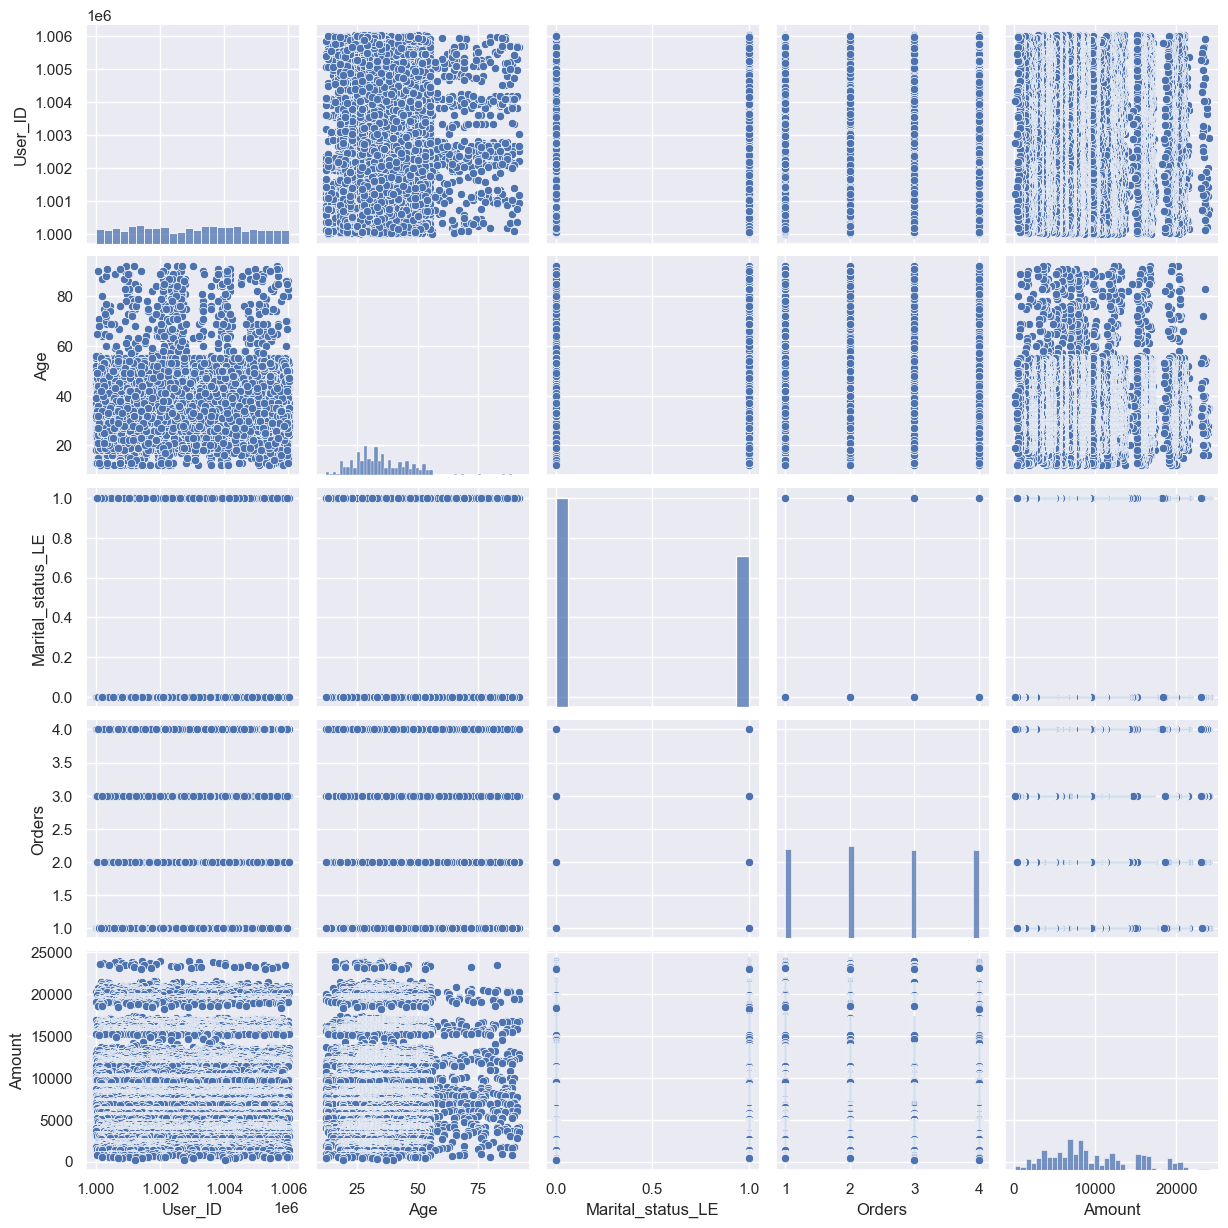

In [775]:
sns.pairplot(df)

# Gender

In [560]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age bins', 'Age',
       'Marital_Status', 'Marital_status_LE', 'State', 'Zone', 'Occupation',
       'Product_Category', 'Orders', 'Amount'],
      dtype='object')

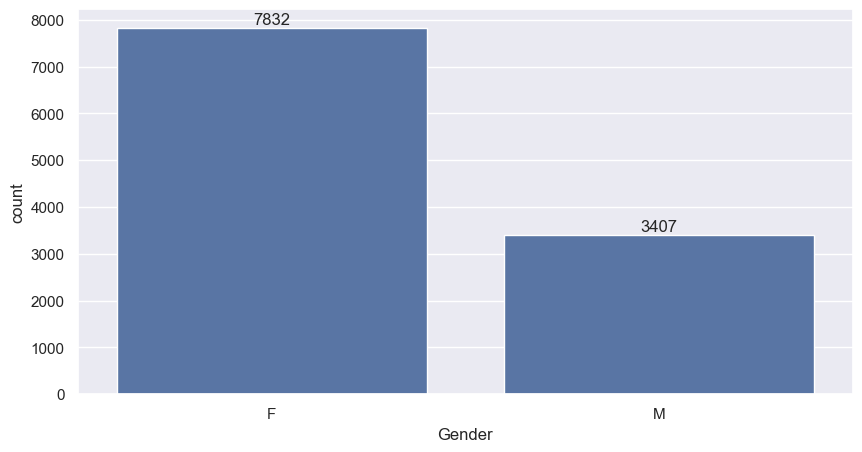

In [582]:
ax=sns.countplot(x='Gender', data=df)

#resizing the graph
sns.set(rc={'figure.figsize':(10,5)})

#for labels on the graph
for bars in ax.containers:
    ax.bar_label(bars)

In [584]:
sales_gen=df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

In [586]:
sales_gen

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

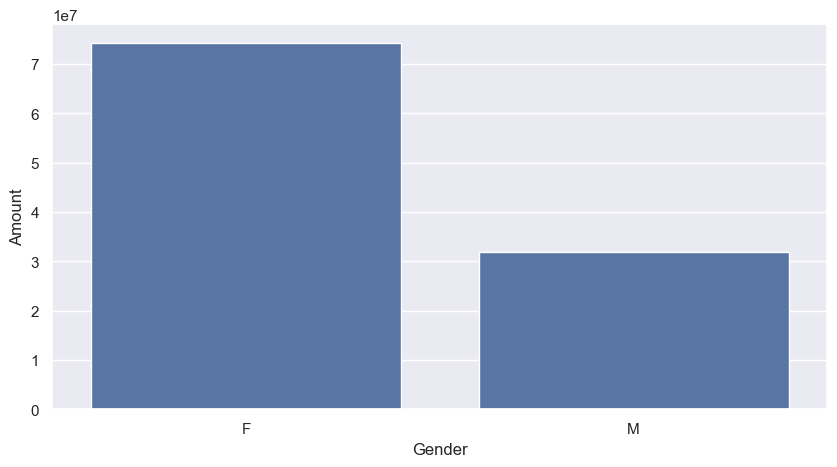

In [588]:
sns.barplot(x='Gender', y="Amount", data=sales_gen)

# Findings

# Age

In [595]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age bins', 'Age',
       'Marital_Status', 'Marital_status_LE', 'State', 'Zone', 'Occupation',
       'Product_Category', 'Orders', 'Amount'],
      dtype='object')

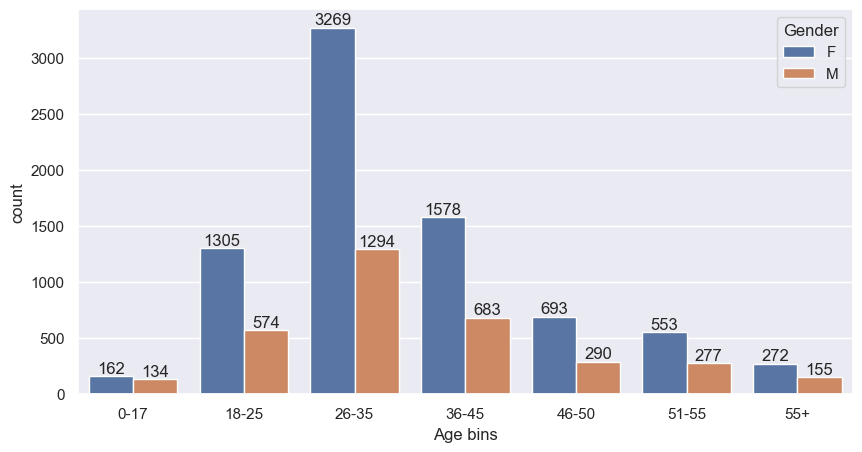

In [603]:
ax= sns.countplot(x='Age bins', data = df, hue= 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

In [615]:
sales_age= df.groupby(['Age bins'] , as_index=False)["Amount"].sum().sort_values(by="Amount", ascending= False)

C:\Users\mamta shresth\AppData\Local\Temp\ipykernel_19640\4246996912.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_age= df.groupby(['Age bins'] , as_index=False)["Amount"].sum().sort_values(by="Amount", ascending= False)


In [617]:
sales_age

,Age bins,Amount
2,26-35,42852589
3,36-45,21905847
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


<Axes: xlabel='Age bins', ylabel='Amount'>

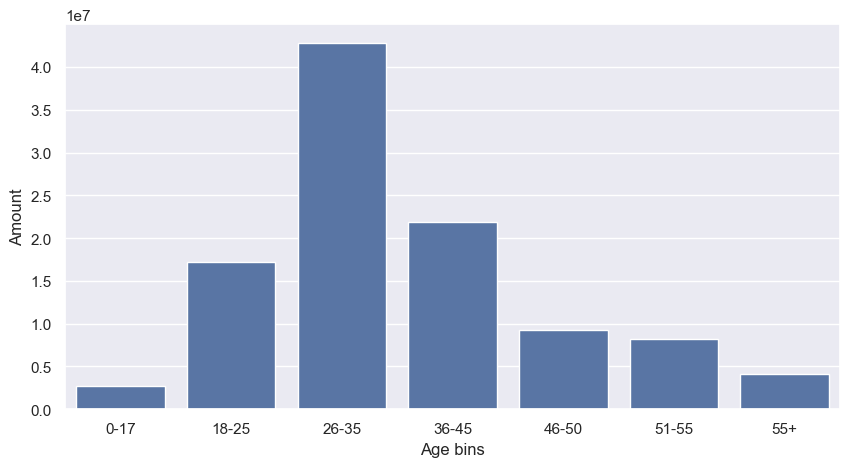

In [625]:
sns.barplot(x="Age bins", y="Amount", data= sales_age)

# Findings

# State

In [631]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age bins', 'Age',
       'Marital_Status', 'Marital_status_LE', 'State', 'Zone', 'Occupation',
       'Product_Category', 'Orders', 'Amount'],
      dtype='object')

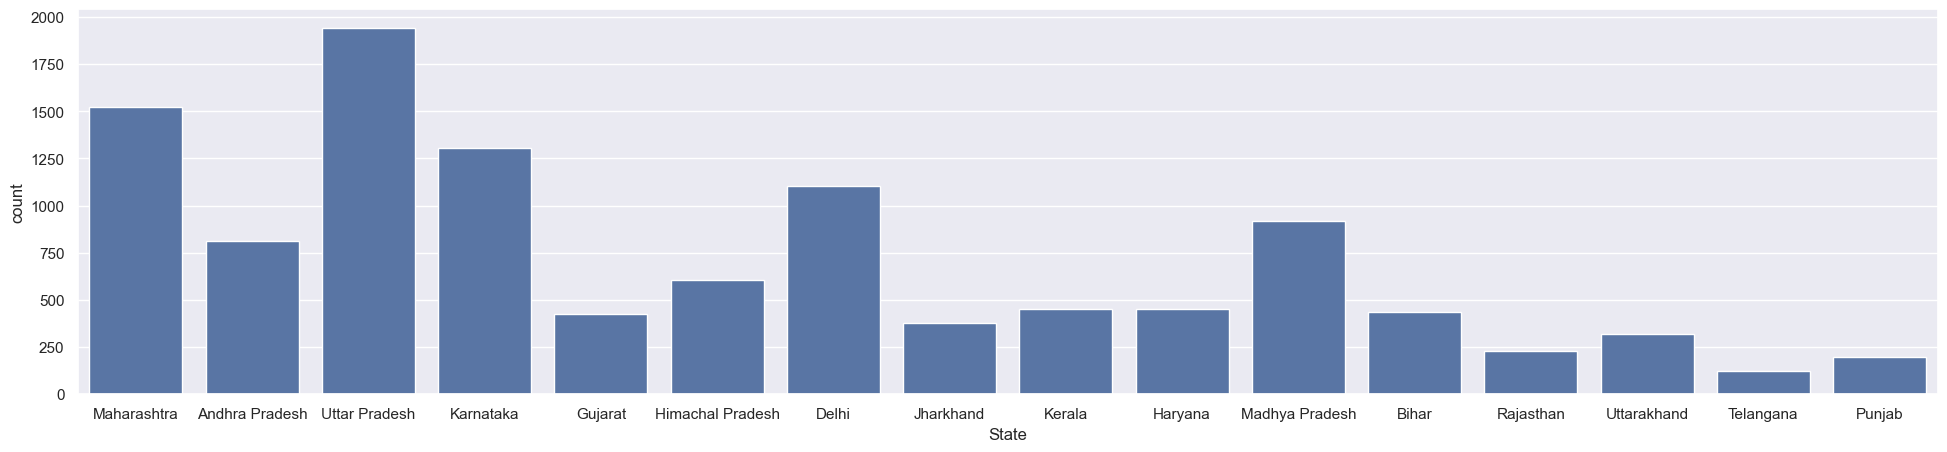

In [643]:
ax= sns.countplot(x='State', data=df)

#resizing the graph
sns.set(rc={'figure.figsize':(25,5)})

In [645]:
#total Amount from top 10 states

sales_state= df.groupby(['State'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending= False).head(10)

In [647]:
sales_state

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


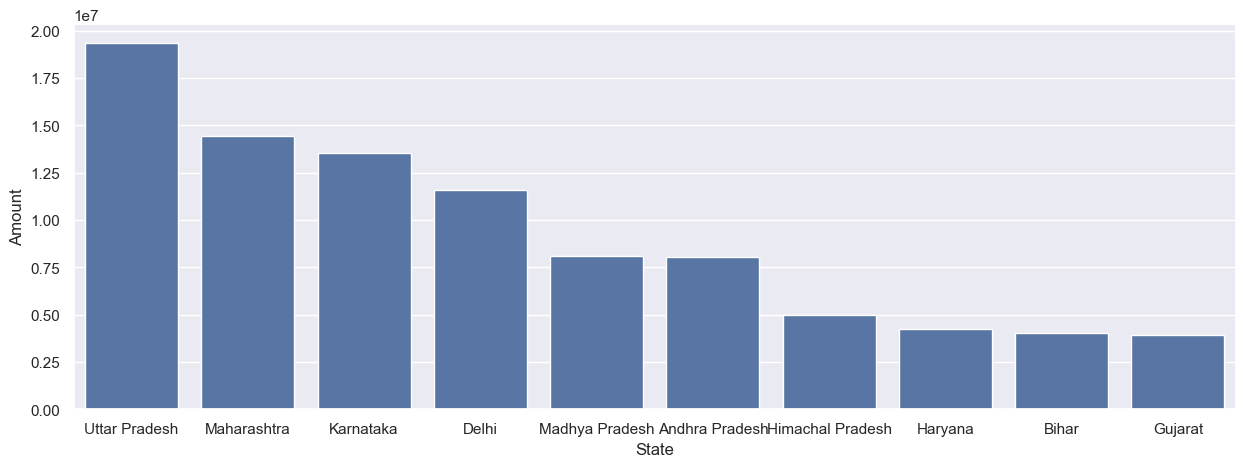

In [653]:
sns.barplot(x= "State", y="Amount", data=sales_state)
sns.set(rc={'figure.figsize':(15,5)})

In [655]:
# total no of order from top 10state

sales_ord= df.groupby(['State'], as_index=False)["Orders"].sum().sort_values(by="Orders", ascending=False).head(10)

In [657]:
sales_ord

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


<Axes: xlabel='State', ylabel='Orders'>

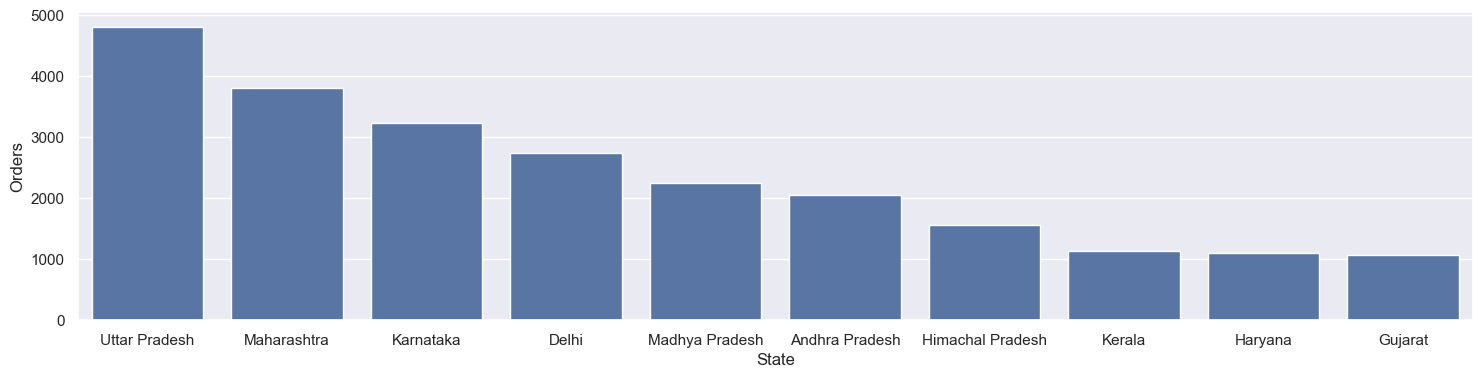

In [659]:
sns.set(rc={'figure.figsize':(18,4)})
sns.barplot(x='State' , y='Orders', data=sales_order)

# Findings

# Marital Status

In [666]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age bins', 'Age',
       'Marital_Status', 'Marital_status_LE', 'State', 'Zone', 'Occupation',
       'Product_Category', 'Orders', 'Amount'],
      dtype='object')

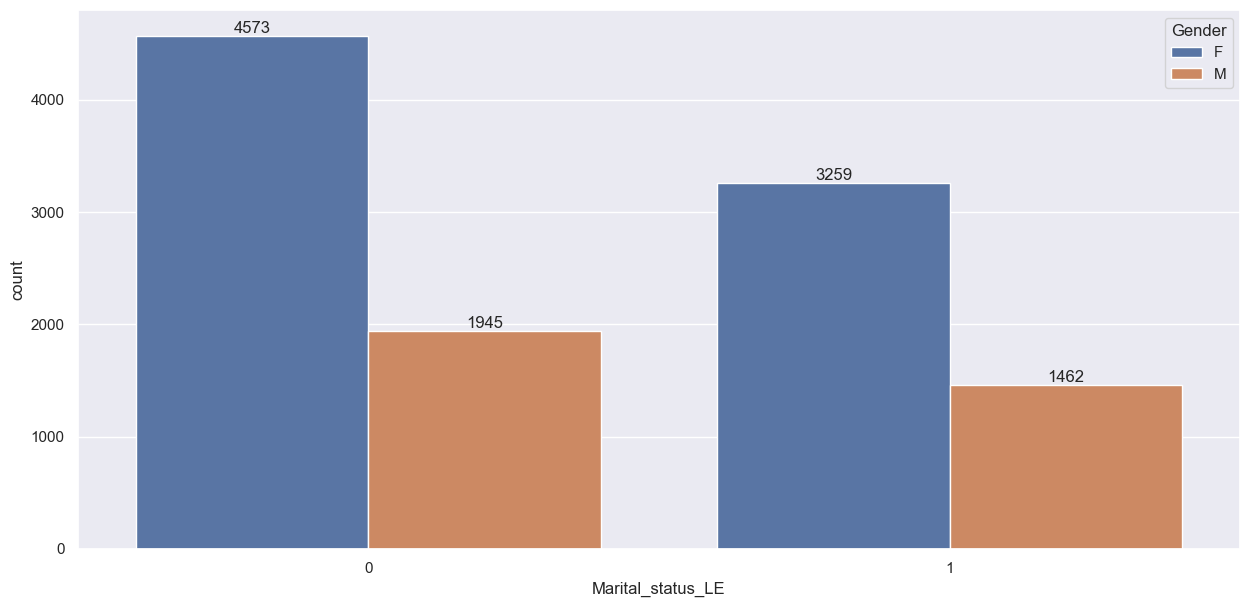

In [670]:
#overall marital status sale


ax= sns.countplot(x= 'Marital_status_LE' , data= df, hue='Gender')
sns.set(rc={'figure.figsize':(15,7)})
for bars in ax.containers:
    ax.bar_label(bars)

In [672]:
sales_marital = df.groupby(['Marital_status_LE' , 'Gender' ] ,as_index= False)['Amount'].sum().sort_values(by= 'Amount', ascending = False)

In [674]:
sales_marital

,Marital_status_LE,Gender,Amount
0,0,F,43786646
2,1,F,30549207
1,0,M,18338738
3,1,M,13574538


<Axes: xlabel='Marital_status_LE', ylabel='Amount'>

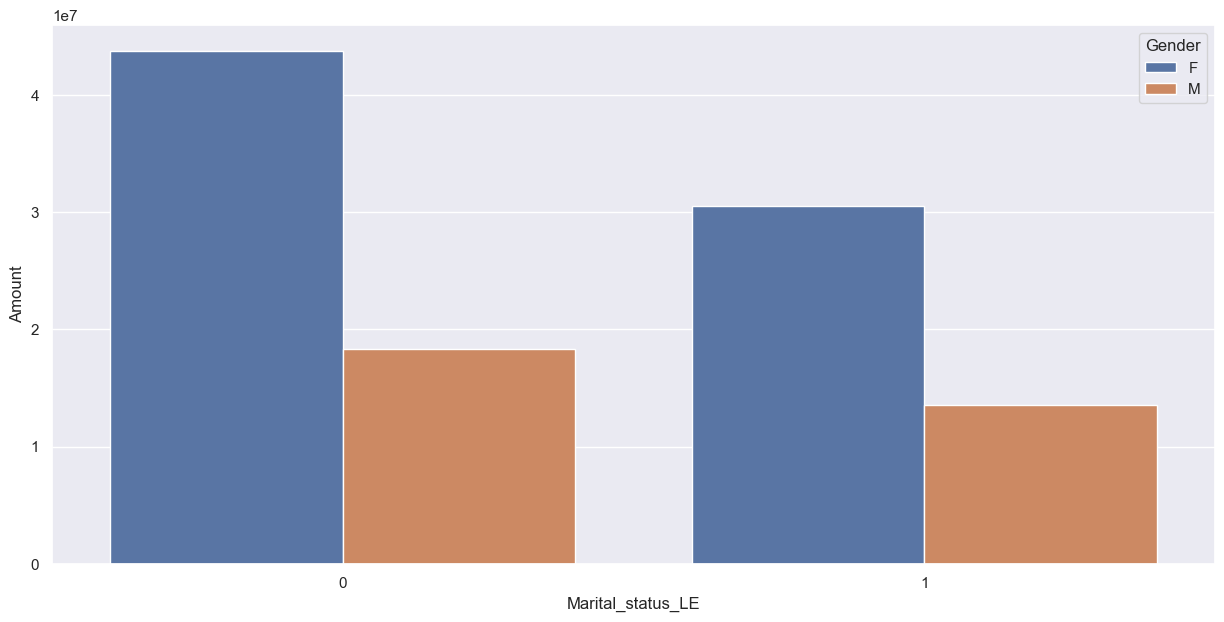

In [678]:
sns.barplot(x='Marital_status_LE' , y='Amount' , data=sales_marital, hue= 'Gender')

# Findings

# Occupation

In [683]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age bins', 'Age',
       'Marital_Status', 'Marital_status_LE', 'State', 'Zone', 'Occupation',
       'Product_Category', 'Orders', 'Amount'],
      dtype='object')

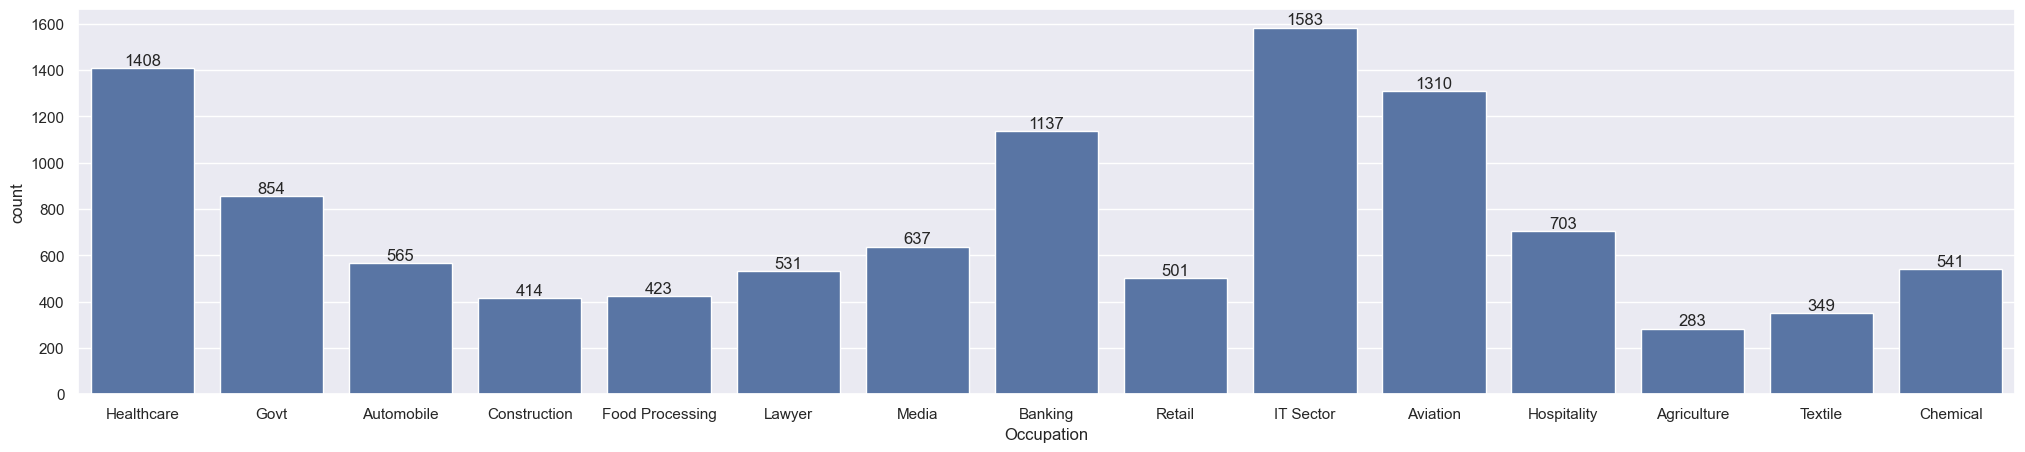

In [687]:
ax= sns.countplot(x= 'Occupation', data= df)
sns.set(rc={'figure.figsize':(25,5)})

for bars in ax.containers:
    ax.bar_label(bars)

In [727]:
sales_occ=df.groupby(["Occupation", "Gender"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending= False)

In [729]:
sales_occ

,Occupation,Gender,Amount
20,IT Sector,F,10184835
4,Aviation,F,9007393
16,Healthcare,F,8968231
6,Banking,F,7792295
14,Govt,F,6002907
21,IT Sector,M,4570244
24,Media,F,4375029
18,Hospitality,F,4183199
17,Healthcare,M,4066355
2,Automobile,F,3768843


<Axes: xlabel='Occupation', ylabel='Amount'>

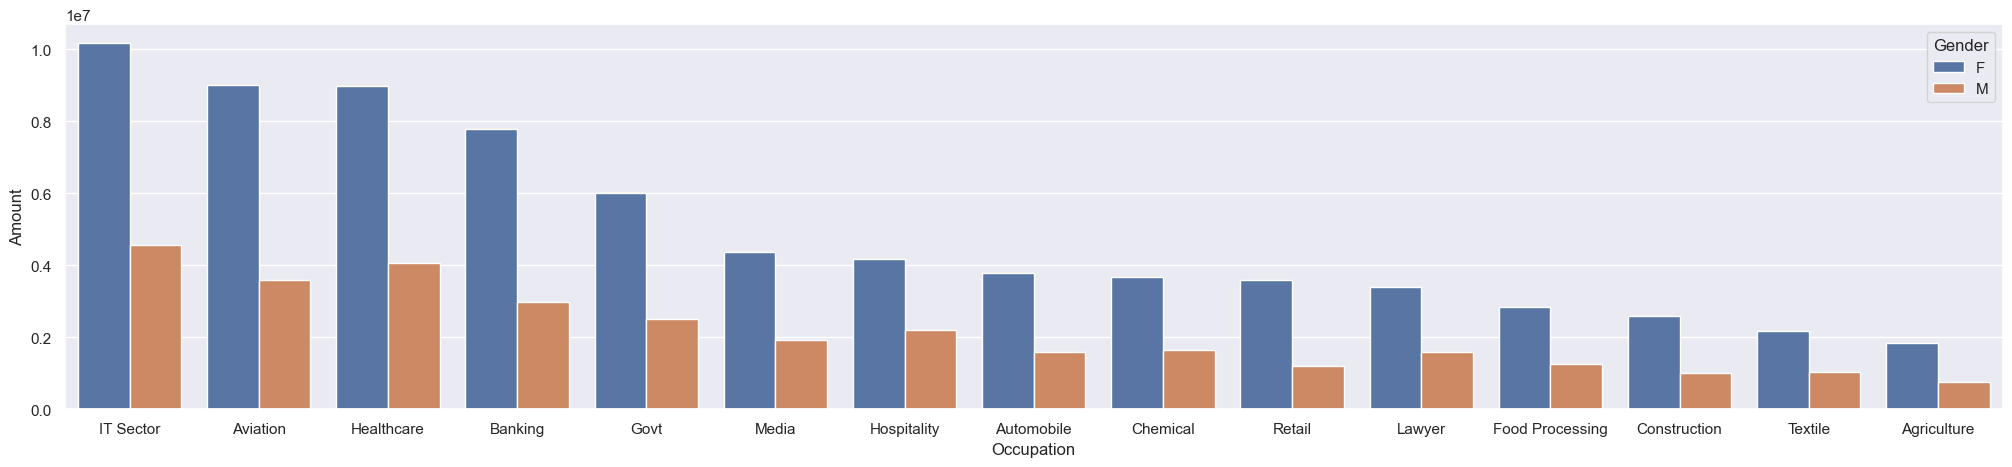

In [731]:
sns.barplot(x="Occupation", y="Amount", data=sales_occ, hue= "Gender")

# Findings

# Product Category

In [736]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age bins', 'Age',
       'Marital_Status', 'Marital_status_LE', 'State', 'Zone', 'Occupation',
       'Product_Category', 'Orders', 'Amount'],
      dtype='object')

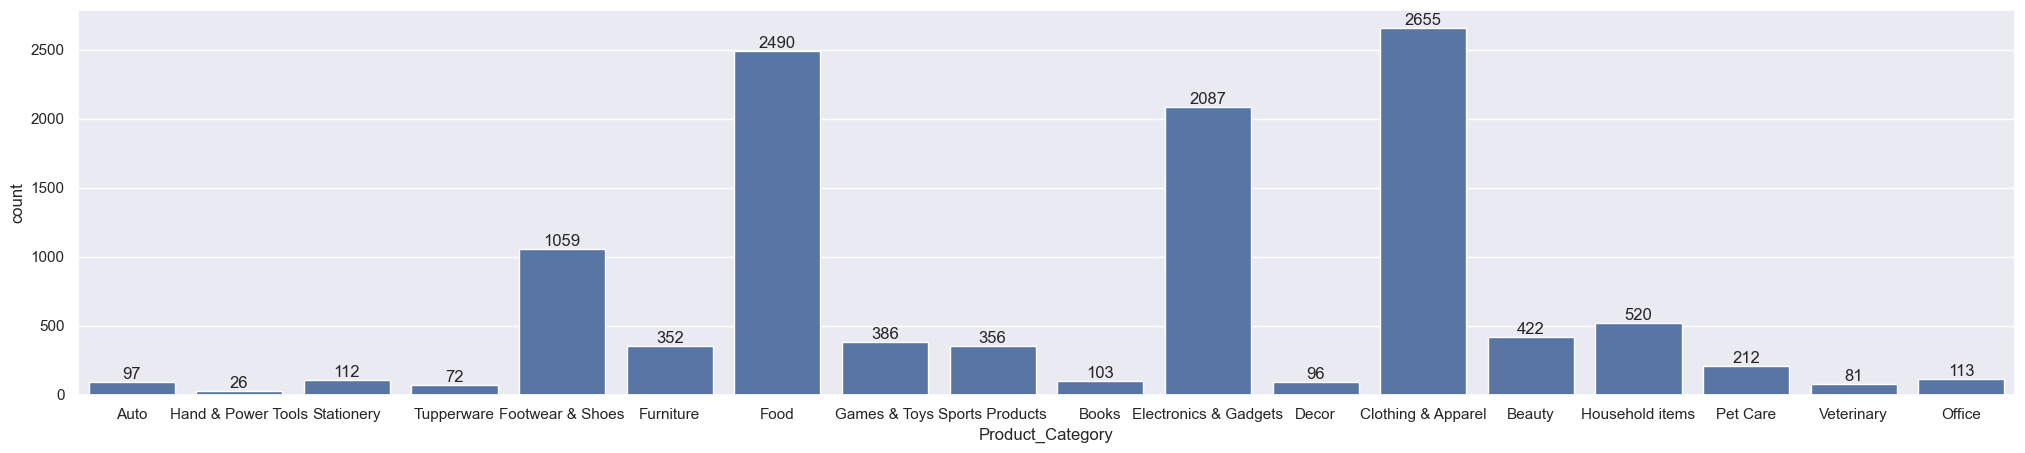

In [740]:
ax= sns.countplot(x= 'Product_Category', data= df)

for bars in ax.containers:
    ax.bar_label(bars)

In [744]:
#top 10 product category
sales_prod = df.groupby(['Product_Category'] , as_index= False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

In [746]:
sales_prod

,Product_Category,Amount
6,Food,33933883
3,Clothing & Apparel,16495019
5,Electronics & Gadgets,15643846
7,Footwear & Shoes,15575209
8,Furniture,5440051
9,Games & Toys,4331694
14,Sports Products,3635933
1,Beauty,1959484
0,Auto,1958609
15,Stationery,1676051


<Axes: xlabel='Product_Category', ylabel='Amount'>

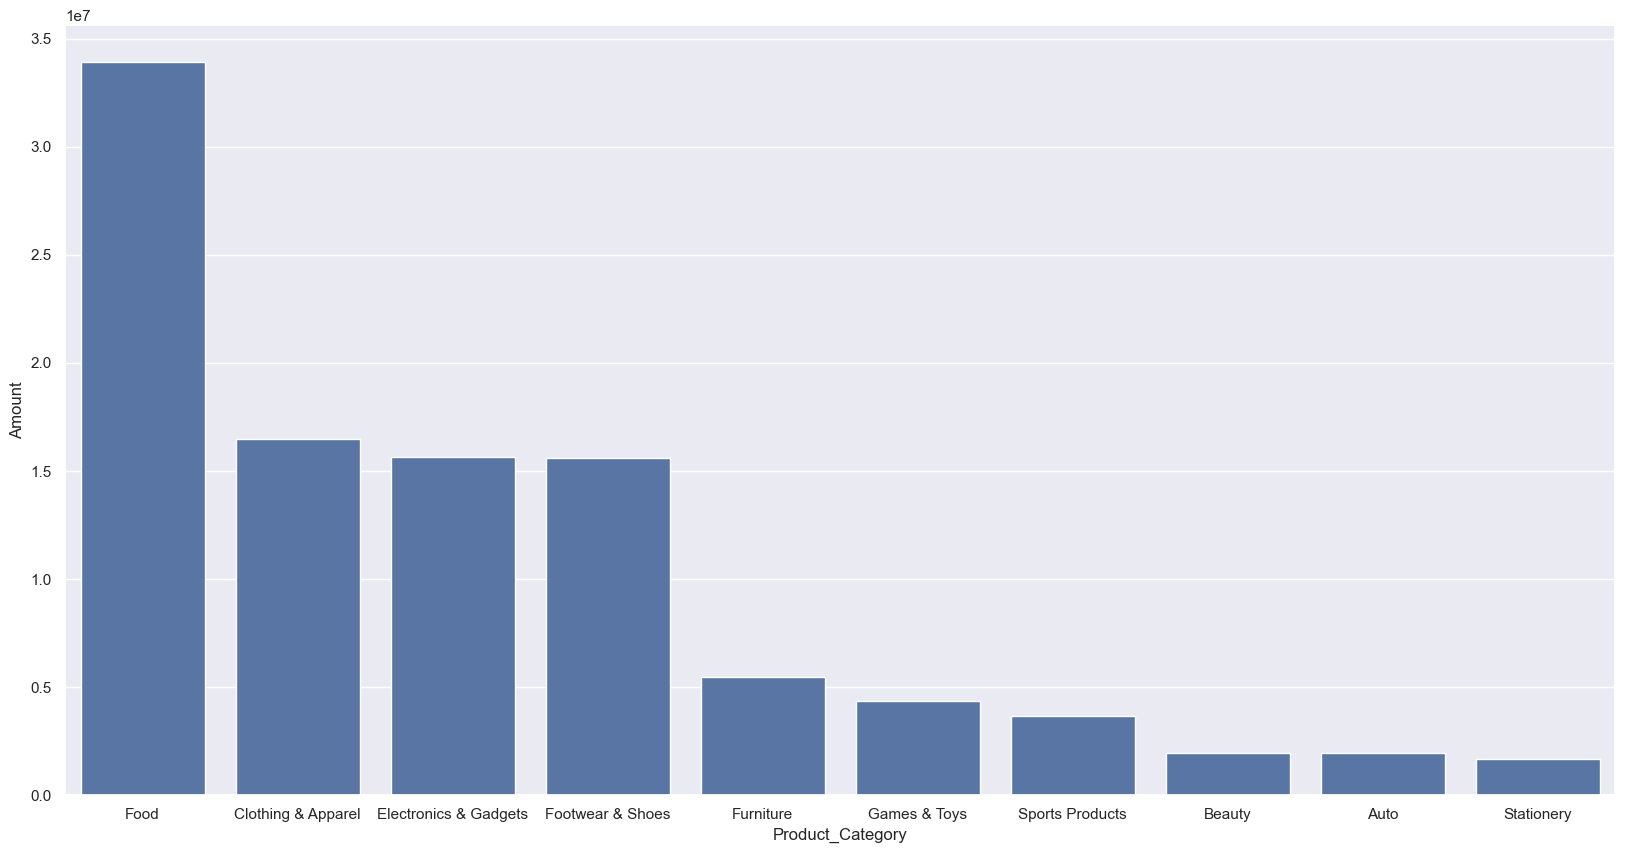

In [748]:
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x= 'Product_Category', y ='Amount' , data=sales_prod)

# Findings

# Product Id

In [756]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age bins', 'Age',
       'Marital_Status', 'Marital_status_LE', 'State', 'Zone', 'Occupation',
       'Product_Category', 'Orders', 'Amount'],
      dtype='object')

In [758]:
sales_pid= df.groupby(['Product_ID'], as_index= False ) ['Amount'].sum().sort_values(by='Amount', ascending= False).head(10)

In [760]:
sales_pid

,Product_ID,Amount
1679,P00265242,540136
644,P00110942,424833
1146,P00184942,401816
654,P00112142,341020
396,P00059442,338571
1504,P00237542,322363
388,P00058042,307040
642,P00110742,294548
643,P00110842,290661
492,P00080342,283309


<Axes: xlabel='Product_ID', ylabel='Amount'>

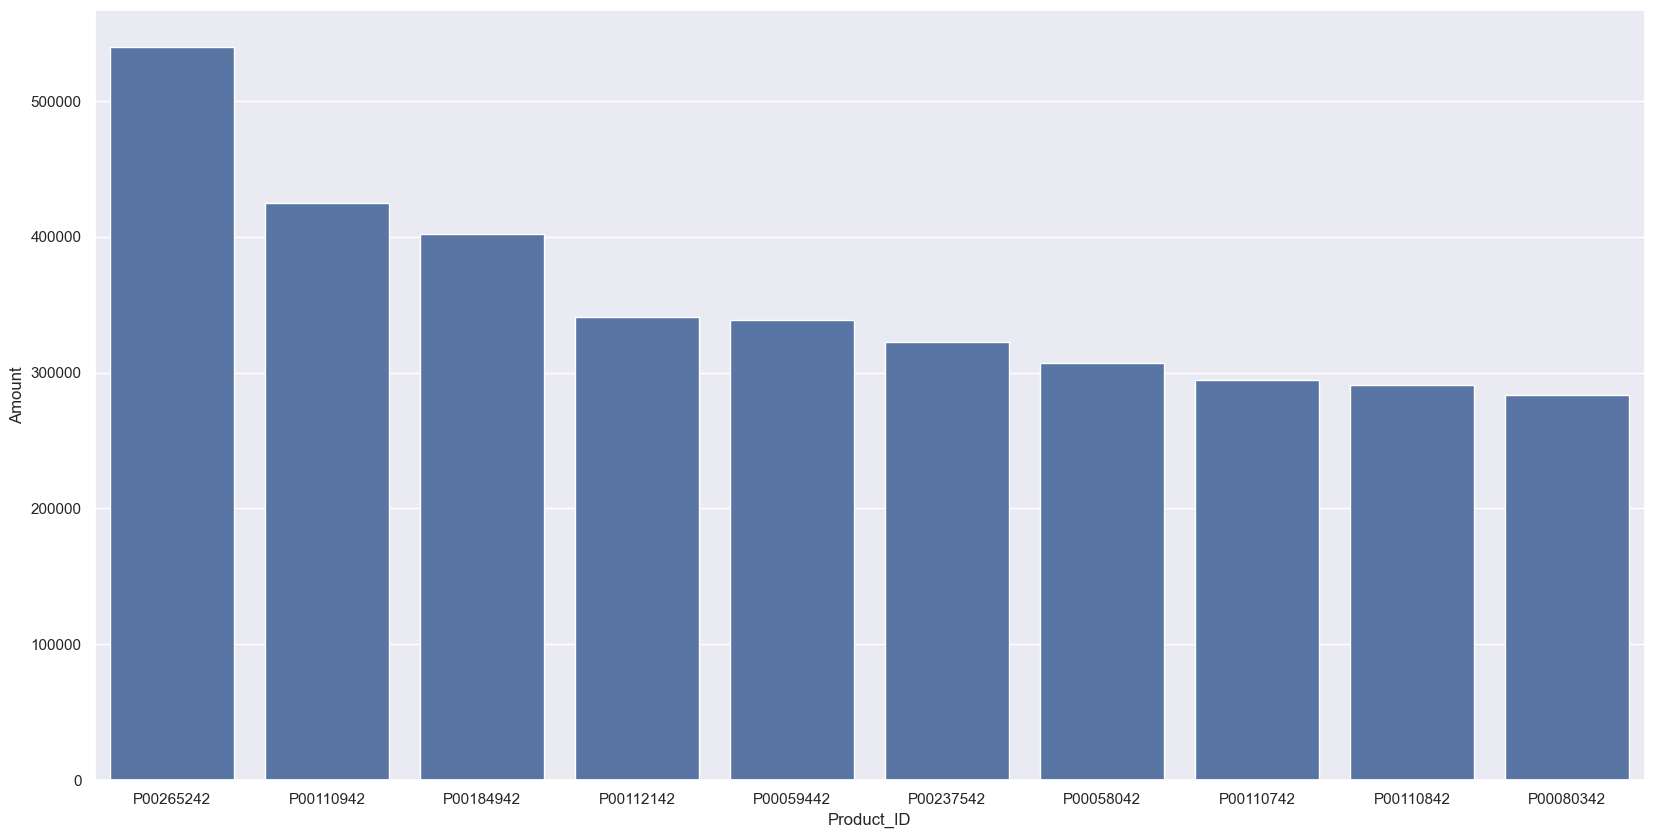

In [762]:
sns.barplot(x='Product_ID' , y= 'Amount', data= sales_pid)

# Findings

# Conclusion